In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [2]:
df=pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
# Categorical columns
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Numerical columns
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)


In [5]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
df['Dependents'] = df['Dependents'].replace('3+', 3)
df['Dependents'] = df['Dependents'].astype(int)

In [7]:
df.drop('Loan_ID',inplace=True,axis=1)

In [8]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
df = pd.get_dummies(df, columns=["Gender"], prefix="Sex")

In [12]:
df

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Sex_Female,Sex_Male
0,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,False,True
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,False,True
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,False,True
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,False,True
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,True,False
610,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,False,True
611,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,False,True
612,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,False,True


In [13]:
df.columns

Index(['Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Sex_Female', 'Sex_Male'],
      dtype='object')

In [21]:
nominal_cols = [ "Self_Employed", "Property_Area"]
df= pd.get_dummies(df, columns=nominal_cols)

In [27]:
# Map 'Y' to 1 and 'N' to 0


In [29]:
df

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Sex_Female,Sex_Male,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,No,0,Graduate,5849,0.0,128.0,360.0,1.0,Y,False,True,True,False,False,False,True
1,Yes,1,Graduate,4583,1508.0,128.0,360.0,1.0,N,False,True,True,False,True,False,False
2,Yes,0,Graduate,3000,0.0,66.0,360.0,1.0,Y,False,True,False,True,False,False,True
3,Yes,0,Not Graduate,2583,2358.0,120.0,360.0,1.0,Y,False,True,True,False,False,False,True
4,No,0,Graduate,6000,0.0,141.0,360.0,1.0,Y,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,No,0,Graduate,2900,0.0,71.0,360.0,1.0,Y,True,False,True,False,True,False,False
610,Yes,3,Graduate,4106,0.0,40.0,180.0,1.0,Y,False,True,True,False,True,False,False
611,Yes,1,Graduate,8072,240.0,253.0,360.0,1.0,Y,False,True,True,False,False,False,True
612,Yes,2,Graduate,7583,0.0,187.0,360.0,1.0,Y,False,True,True,False,False,False,True


In [32]:
df['Loan_Status']=LE.fit_transform(df['Loan_Status'])
df['Education']=LE.fit_transform(df['Education'])
df['Married']=LE.fit_transform(df['Married'])
df

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Sex_Female,Sex_Male,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0,5849,0.0,128.0,360.0,1.0,1,False,True,True,False,False,False,True
1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,False,True,True,False,True,False,False
2,1,0,0,3000,0.0,66.0,360.0,1.0,1,False,True,False,True,False,False,True
3,1,0,1,2583,2358.0,120.0,360.0,1.0,1,False,True,True,False,False,False,True
4,0,0,0,6000,0.0,141.0,360.0,1.0,1,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,2900,0.0,71.0,360.0,1.0,1,True,False,True,False,True,False,False
610,1,3,0,4106,0.0,40.0,180.0,1.0,1,False,True,True,False,True,False,False
611,1,1,0,8072,240.0,253.0,360.0,1.0,1,False,True,True,False,False,False,True
612,1,2,0,7583,0.0,187.0,360.0,1.0,1,False,True,True,False,False,False,True


In [34]:
['ApplicantIncome','CoapplicantIncome','LoanAmount']

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

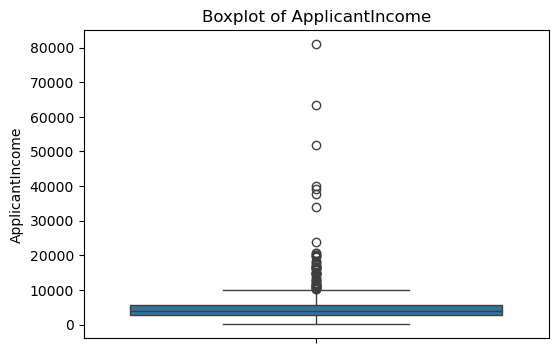

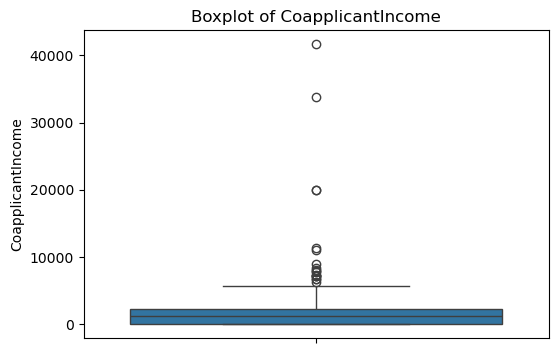

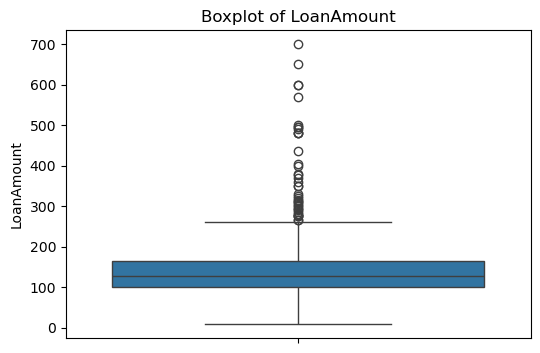

In [36]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

In [37]:
Q1 = np.percentile(df['ApplicantIncome'], 25)
Q3 = np.percentile(df['ApplicantIncome'], 75)
IQR = Q3 - Q1
UB = Q3 + 1.5 * IQR
LB = Q1 - 1.5 * IQR
med=df['ApplicantIncome'].median()
Cond1=df['ApplicantIncome']>UB
Cond2=df['ApplicantIncome']<LB
df['ApplicantIncome']= np.where(Cond1 | Cond2, med, df['ApplicantIncome'])

In [39]:
Q1 = np.percentile(df['CoapplicantIncome'], 25)
Q3 = np.percentile(df['CoapplicantIncome'], 75)
IQR = Q3 - Q1
UB = Q3 + 1.5 * IQR
LB = Q1 - 1.5 * IQR
med=df['CoapplicantIncome'].median()
Cond1=df['CoapplicantIncome']>UB
Cond2=df['CoapplicantIncome']<LB
df['CoapplicantIncome']= np.where(Cond1 | Cond2, med, df['CoapplicantIncome'])

In [42]:
Q1 = np.percentile(df['LoanAmount'], 25)
Q3 = np.percentile(df['LoanAmount'], 75)
IQR = Q3 - Q1
UB = Q3 + 1.5 * IQR
LB = Q1 - 1.5 * IQR
med=df['LoanAmount'].median()
Cond1=df['LoanAmount']>UB
Cond2=df['LoanAmount']<LB
df['LoanAmount']= np.where(Cond1 | Cond2, med, df['LoanAmount'])

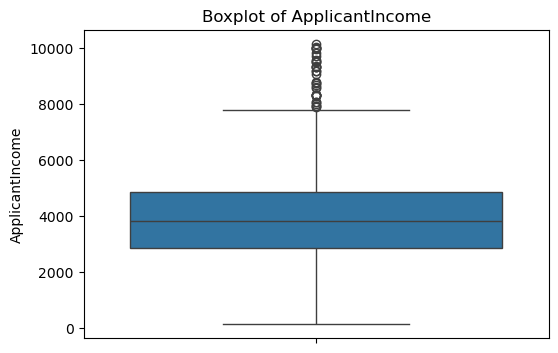

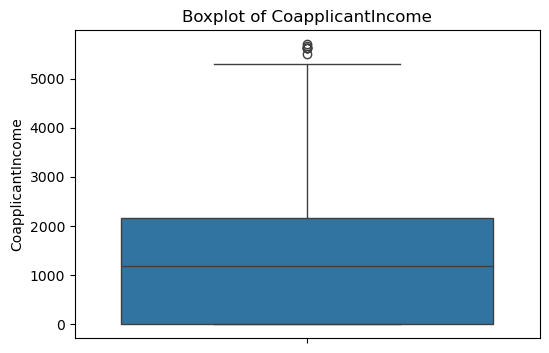

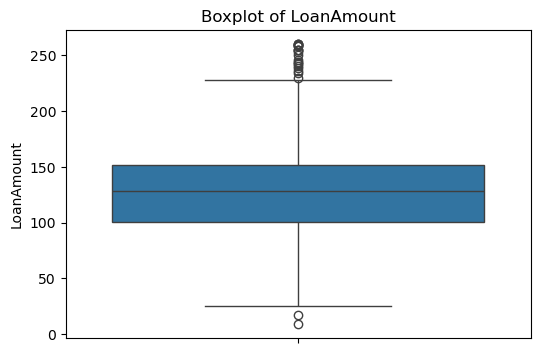

In [44]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

In [45]:
df

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Sex_Female,Sex_Male,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0,5849.0,0.0,128.0,360.0,1.0,1,False,True,True,False,False,False,True
1,1,1,0,4583.0,1508.0,128.0,360.0,1.0,0,False,True,True,False,True,False,False
2,1,0,0,3000.0,0.0,66.0,360.0,1.0,1,False,True,False,True,False,False,True
3,1,0,1,2583.0,2358.0,120.0,360.0,1.0,1,False,True,True,False,False,False,True
4,0,0,0,6000.0,0.0,141.0,360.0,1.0,1,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,2900.0,0.0,71.0,360.0,1.0,1,True,False,True,False,True,False,False
610,1,3,0,4106.0,0.0,40.0,180.0,1.0,1,False,True,True,False,True,False,False
611,1,1,0,8072.0,240.0,253.0,360.0,1.0,1,False,True,True,False,False,False,True
612,1,2,0,7583.0,0.0,187.0,360.0,1.0,1,False,True,True,False,False,False,True


_____________________________

**Model Development**

In [50]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [52]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

**Logistic Regression model**

In [57]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [59]:
LR.fit(X_train,y_train)

LogisticRegression()

In [61]:
y_pred=LR.predict(X_test)

In [63]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", cm)

Accuracy: 0.7783783783783784
Precision: 0.7515923566878981
Recall: 0.9833333333333333
F1 score: 0.851985559566787
Confusion matrix:
 [[ 26  39]
 [  2 118]]


_________________________________________________________

**Naive byes**

In [67]:
from sklearn.naive_bayes import GaussianNB
GB=GaussianNB()

In [69]:
GB.fit(X_train,y_train)

GaussianNB()

In [71]:
y_pred=GB.predict(X_test)

In [73]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", cm)

Accuracy: 0.772972972972973
Precision: 0.7532467532467533
Recall: 0.9666666666666667
F1 score: 0.8467153284671532
Confusion matrix:
 [[ 27  38]
 [  4 116]]


_____________________________________________________

**Decision Tree**

In [77]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

In [79]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [81]:
y_pred=DT.predict(X_test)

In [359]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", cm)

Accuracy: 0.6918918918918919
Precision: 0.7333333333333333
Recall: 0.825
F1 score: 0.7764705882352941
Confusion matrix:
 [[29 36]
 [21 99]]


_________________________

**KNN**

In [381]:
from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier(n_neighbors=5)

In [383]:
KN.fit(X_train,y_train)

KNeighborsClassifier()

In [385]:
y_pred=KN.predict(X_test)

In [387]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", cm)

Accuracy: 0.5621621621621622
Precision: 0.6274509803921569
Recall: 0.8
F1 score: 0.7032967032967034
Confusion matrix:
 [[ 8 57]
 [24 96]]


_________________________________________

**Random forest**

In [391]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()

In [393]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [395]:
y_pred=RF.predict(X_test)

In [397]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", cm)

Accuracy: 0.745945945945946
Precision: 0.7449664429530202
Recall: 0.925
F1 score: 0.8252788104089219
Confusion matrix:
 [[ 27  38]
 [  9 111]]


______________

In [402]:
from sklearn.svm import SVC
SV = SVC()

In [406]:
SV.fit(X_train,y_train)

SVC()

In [408]:
y_pred=SV.predict(X_test)

In [410]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", cm)

Accuracy: 0.6486486486486487
Precision: 0.6486486486486487
Recall: 1.0
F1 score: 0.7868852459016393
Confusion matrix:
 [[  0  65]
 [  0 120]]


____________________

**Now using hyperparameters to see which of my models work well**

In [414]:
from sklearn.model_selection import GridSearchCV

**Logistic Regression**

In [422]:
LR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [424]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],   
    'C': [0.01, 0.1, 1, 10, 100],                 
    'solver': ['liblinear', 'saga', 'lbfgs'],     
    'max_iter': [100, 200, 500],                  
    'l1_ratio': [0, 0.5, 1]                       
}


In [428]:
grid=GridSearchCV(LR,param_grid,cv=4,scoring='accuracy',verbose=True)
grid

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.5, 1],
                         'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['liblinear', 'saga', 'lbfgs']},
             scoring='accuracy', verbose=True)

In [430]:
import time
start=time.time()
grid.fit(X_train,y_train)
end=time.time()
print("The total time taken is",(end-start))

Fitting 4 folds for each of 540 candidates, totalling 2160 fits
The total time taken is 92.35028743743896


In [432]:
grid.best_estimator_

LogisticRegression(C=0.01, l1_ratio=0, max_iter=200, penalty=None)

In [434]:
LR=LogisticRegression(C=0.01, l1_ratio=0, max_iter=200, penalty=None)

In [436]:
LR.fit(X_train,y_train)

LogisticRegression(C=0.01, l1_ratio=0, max_iter=200, penalty=None)

In [438]:
y_pred=LR.predict(X_test)

In [440]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", cm)

Accuracy: 0.7837837837837838
Precision: 0.7564102564102564
Recall: 0.9833333333333333
F1 score: 0.855072463768116
Confusion matrix:
 [[ 27  38]
 [  2 118]]


Without hyper param my Logistic regression accuracy was 0.77 now uts 0.78

________________

Hypr tuned logistic

In [526]:
pickle.dump(LR,open('analytics_model_logistic','wb'))